<a href="https://colab.research.google.com/github/maxshenderov/dgango/blob/master/2_3_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = titanic_data.drop(['PassengerId','Survived','Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X = X.fillna({'Age': X.Age.median()})

In [ ]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

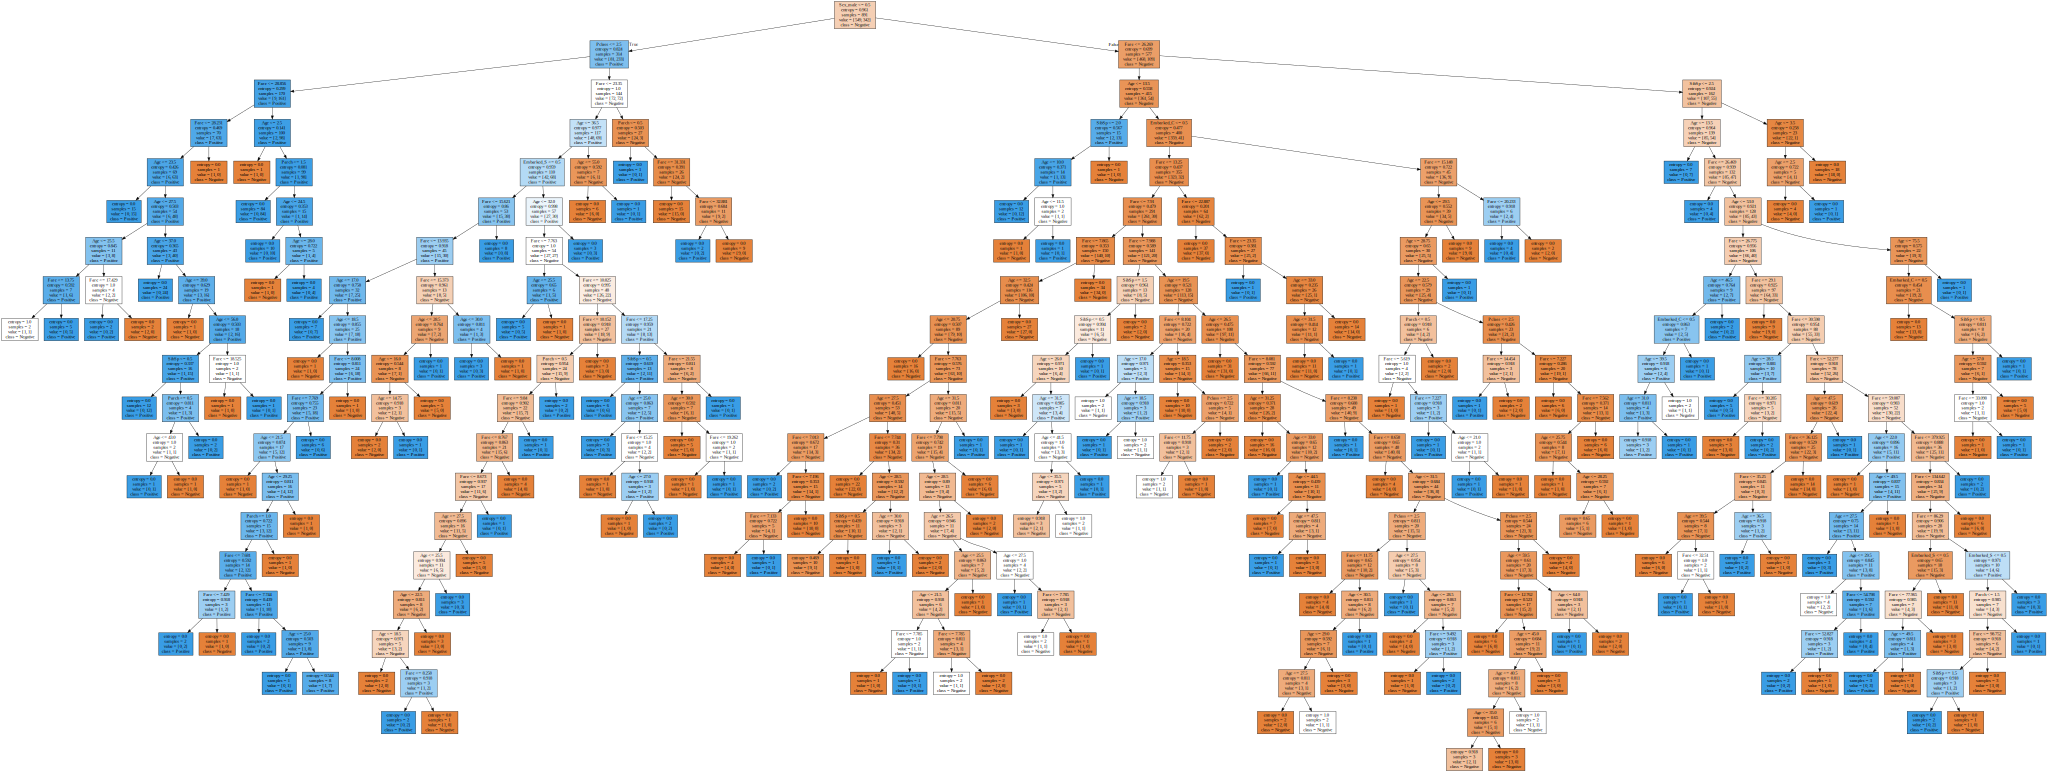

In [ ]:
import sklearn
graph = Source(sklearn.tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

#### решение проблемы переобучения - ограничение глубины дерева или использование двух выборок

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(596, 10)

In [ ]:
X_test.shape

(295, 10)

In [ ]:
clf.score(X, y)

0.9797979797979798

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(X_train, y_train)

0.9798657718120806

In [ ]:
clf.score(X_test, y_test)

0.7627118644067796

большая разница в значениях говорит об overfitting

ограничим глубину дерева:

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(X_train, y_train)

0.8238255033557047

In [ ]:
clf.score(X_test, y_test)

0.8203389830508474

### эффективный подбор параметров

In [ ]:
max_depth_values = range(1, 100)

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [ ]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


https://stackoverflow.com/questions/51422146/install-the-latest-version-of-seaborn-0-9-0-through-pip

 pip3 install seaborn==0.9.0

In [ ]:
import seaborn

In [ ]:
seaborn.__version__

'0.11.0'

https://seaborn.pydata.org/generated/seaborn.lineplot.html

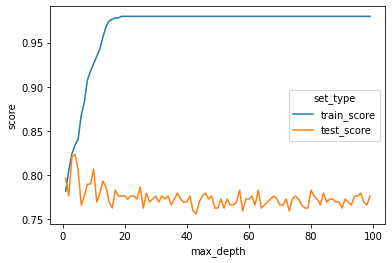

In [ ]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

#### анализ графика:
- с увеличеним глубины дерева растет точность классификации на тренировочной выборке
- но это не всегда ведет к нахождению общих закономерностей исследуемых данных
- test score изначально невелик(модель ещ ене доучилась), на промежутке 3-5 score максимален(оптимальное состояние: закономерность с изученных данных переносится на новые), но в дальнейшем с увеличеним train score начинает падать test score(переход от недообученности к переобученности)

https://scikit-learn.org/stable/modules/cross_validation.html

обучение на нескольких подвыборках выборках:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
cross_val_score(clf, X_train, y_train , cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [ ]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7886274509803922

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

кроссвалидация где 5 фолдеров (cv=5)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392


In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [ ]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


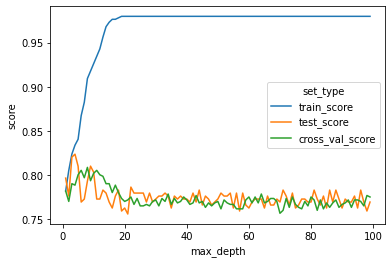

In [ ]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

максимальная точность достигается при большей глубине дерева, чем 3-5

cross_val_score более устойчив к переобучению

найдем дерево с максимальным значением cross_val_score

In [ ]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.805434
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.808768
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.802031


5	cross_val_score	0.800303

In [ ]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [ ]:
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.7932203389830509

In [ ]:
from sklearn.model_selection import GridSearchCV

STEP 2.6

In [ ]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
precision_score(y_test, y_pred)

0.8023255813953488

In [ ]:
recall_score(y_test, y_pred)

0.575

In [ ]:
y_predicted_prob = best_clf.predict_proba(X_test)

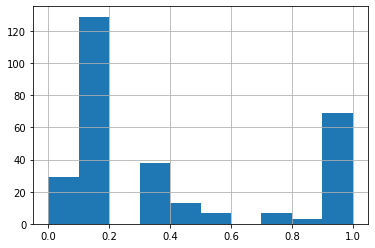

In [ ]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [ ]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [ ]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.11481481, 1.        , 0.34375   , 0.        , 0.76190476,
       0.875     , 0.39285714, 0.4       , 0.6       , 0.92307692,
       0.41176471])

In [ ]:
precision_score(y_test, y_pred)

0.8840579710144928

In [ ]:
recall_score(y_test, y_pred)

0.5083333333333333

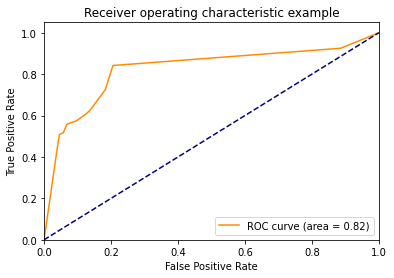

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()